## 引言

来自：https://towardsdatascience.com/understanding-feature-engineering-part-1-continuous-numeric-data-da4e47099a7b

从数据集角度来看，feature可以分为raw feature和derived feature。前者直接来自数据集，后者是通过对数据集中已有的raw feature加工得到。

numeric data可以分为continuous data和discrete data，后者又称categorical data。

## 例子

下面是一个对continuous numerica data进行特征工程的例子

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as spstats
%matplotlib inline

导入数据集（宝可梦）

In [2]:
poke_df = pd.read_csv('data/Pokemon.csv', encoding='utf-8')
poke_df.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


### 1. Values 

values可以作为直接使用的raw faeture。

In [3]:
poke_df[['HP', 'Attack', 'Defense']].head()

,HP,Attack,Defense
0,45,49,49
1,60,62,63
2,80,82,83
3,80,100,123
4,39,52,43


这三个features的一些统计指标

In [4]:
poke_df[['HP', 'Attack', 'Defense']].describe()

,HP,Attack,Defense
count,800.000000,800.000000,800.000000
mean,69.258750,79.001250,73.842500
std,25.534669,32.457366,31.183501
min,1.000000,5.000000,5.000000
25%,50.000000,55.000000,50.000000
50%,65.000000,75.000000,70.000000
75%,80.000000,100.000000,90.000000
max,255.000000,190.000000,230.000000


### 2. Counts

另一类直接可用的raw faeture是counts，即对某事物的计数。

### 3. Binarization

不关心具体值，只关心有没有。

In [ ]:
watched = np.array(popsong_df['listen_count']) 
watched[watched >= 1] = 1
popsong_df['watched'] = watched

### 4. Rounding

不关心高位，则舍入。

In [ ]:
items_popularity = pd.read_csv('datasets/item_popularity.csv',  
                               encoding='utf-8')
items_popularity['popularity_scale_10'] = np.array(
                   np.round((items_popularity['pop_percent'] * 10)),  
                   dtype='int')
items_popularity['popularity_scale_100'] = np.array(
                  np.round((items_popularity['pop_percent'] * 100)),    
                  dtype='int')
items_popularity

### 5. Interactions

各变量可能有相关性，可以直接计算出对应的列。这样在用线性模型时便可以描述相关性。

In [5]:
atk_def = poke_df[['Attack', 'Defense']]
atk_def.head()

,Attack,Defense
0,49,49
1,62,63
2,82,83
3,100,123
4,52,43


In [6]:
from sklearn.preprocessing import PolynomialFeatures
pf = PolynomialFeatures(degree=2, interaction_only=False,  
                        include_bias=False)
res = pf.fit_transform(atk_def)
res

array([[   49.,    49.,  2401.,  2401.,  2401.],
       [   62.,    63.,  3844.,  3906.,  3969.],
       [   82.,    83.,  6724.,  6806.,  6889.],
       ...,
       [  110.,    60., 12100.,  6600.,  3600.],
       [  160.,    60., 25600.,  9600.,  3600.],
       [  110.,   120., 12100., 13200., 14400.]])

In [7]:
intr_features = pd.DataFrame(res, columns=['Attack', 'Defense',  
                                           'Attack^2', 
                                           'Attack x Defense',  
                                           'Defense^2'])
intr_features.head(5)

,Attack,Defense,Attack^2,Attack x Defense,Defense^2
0,49.0,49.0,2401.0,2401.0,2401.0
1,62.0,63.0,3844.0,3906.0,3969.0
2,82.0,83.0,6724.0,6806.0,6889.0
3,100.0,123.0,10000.0,12300.0,15129.0
4,52.0,43.0,2704.0,2236.0,1849.0


### 6. Binning

有些时候，数据集中numeric values的分布可能被扭曲，比如有些值会频繁出现，有些值不出现。这可能会对模型造成影响。此时可以进行binning操作，即划定一个个范围，将原本连续的数据离散化。

In [3]:
fcc_survey_df = pd.read_csv('data/2016-FCC-New-Coders-Survey-Data.csv', encoding='utf-8')
fcc_survey_df[['ID.x', 'EmploymentField', 'Age', 'Income']].head()

c:\users\邱梓豪\appdata\local\programs\python\python37\lib\site-packages\IPython\core\interactiveshell.py:3020: DtypeWarning: Columns (21,57) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,ID.x,EmploymentField,Age,Income
0,cef35615d61b202f1dc794ef2746df14,office and administrative support,28.0,32000.0
1,323e5a113644d18185c743c241407754,food and beverage,22.0,15000.0
2,b29a1027e5cd062e654a63764157461d,finance,19.0,48000.0
3,04a11e4bcb573a1261eb0d9948d32637,"arts, entertainment, sports, or media",26.0,43000.0
4,9368291c93d5d5f5c8cdb1a575e18bec,education,20.0,6000.0


Text(0, 0.5, 'Frequency')

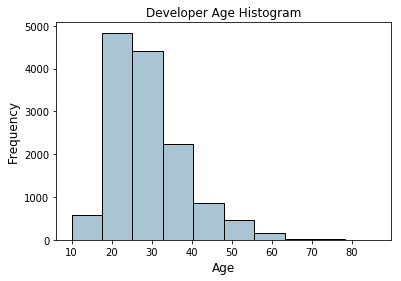

In [9]:
fig, ax = plt.subplots()
fcc_survey_df['Age'].hist(color='#A9C5D3', edgecolor='black',  
                          grid=False)
ax.set_title('Developer Age Histogram', fontsize=12)
ax.set_xlabel('Age', fontsize=12)
ax.set_ylabel('Frequency', fontsize=12)

该分布比实际的要向右歪了一点（实际上大龄开发者比例应该更小），可以设置如下的一些bins：

Age Range: Bin  
 0 -  9  : 0  
10 - 19  : 1  
20 - 29  : 2  
30 - 39  : 3  
40 - 49  : 4   
50 - 59  : 5  
60 - 69  : 6  
  ... and so on

用rounding操作即可实现。

In [10]:
fcc_survey_df['Age_bin_round'] = np.array(np.floor(
                              np.array(fcc_survey_df['Age']) / 10.))
fcc_survey_df[['ID.x', 'Age', 'Age_bin_round']].iloc[1071:1076]

,ID.x,Age,Age_bin_round
1071,16a328da44ceb840863031f35dd3923e,22.0,2.0
1072,54bda0adcf9aa98fa0b3f9b5f608c851,21.0,2.0
1073,0c74ada07ff4ea3f1bf48b4fd79159f9,40.0,4.0
1074,87f04e2ef23e2c517c73e438da1867b1,34.0,3.0
1075,7a2c672065d3802525c733efc1b16219,29.0,2.0


bins的设置也可以更灵活（运用pandas的cut函数）：

In [11]:
bin_ranges = [0, 15, 30, 45, 60, 75, 100]
bin_names = [1, 2, 3, 4, 5, 6]
fcc_survey_df['Age_bin_custom_range'] = pd.cut(
                                           np.array(
                                              fcc_survey_df['Age']), 
                                              bins=bin_ranges)
fcc_survey_df['Age_bin_custom_label'] = pd.cut(
                                           np.array(
                                              fcc_survey_df['Age']), 
                                              bins=bin_ranges,            
                                              labels=bin_names)
# view the binned features 
fcc_survey_df[['ID.x', 'Age', 'Age_bin_round', 
               'Age_bin_custom_range',   
               'Age_bin_custom_label']].iloc[1071:1076]

,ID.x,Age,Age_bin_round,Age_bin_custom_range,Age_bin_custom_label
1071,16a328da44ceb840863031f35dd3923e,22.0,2.0,"(15, 30]",2
1072,54bda0adcf9aa98fa0b3f9b5f608c851,21.0,2.0,"(15, 30]",2
1073,0c74ada07ff4ea3f1bf48b4fd79159f9,40.0,4.0,"(30, 45]",3
1074,87f04e2ef23e2c517c73e438da1867b1,34.0,3.0,"(30, 45]",3
1075,7a2c672065d3802525c733efc1b16219,29.0,2.0,"(15, 30]",2


#### Adaptive Binning

利用数据分布本身的分位点作为bin，使得分布更均匀（Quantile based binning）。q-Quantiles意味着将数据均匀分为q份。

Text(0, 0.5, 'Frequency')

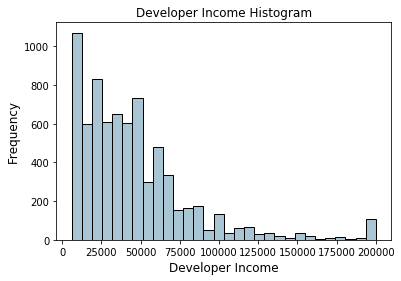

In [12]:
fig, ax = plt.subplots()
fcc_survey_df['Income'].hist(bins=30, color='#A9C5D3', 
                             edgecolor='black', grid=False)
ax.set_title('Developer Income Histogram', fontsize=12)
ax.set_xlabel('Developer Income', fontsize=12)
ax.set_ylabel('Frequency', fontsize=12)

可以看出这个分布有点向左歪。

In [13]:
quantile_list = [0, .25, .5, .75, 1.]
quantiles = fcc_survey_df['Income'].quantile(quantile_list)
quantiles         # 可以获得五个分位点

0.00      6000.0
0.25     20000.0
0.50     37000.0
0.75     60000.0
1.00    200000.0
Name: Income, dtype: float64

Text(0, 0.5, 'Frequency')

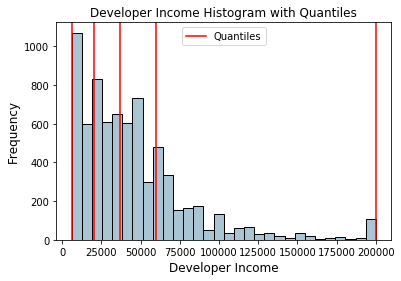

In [14]:
fig, ax = plt.subplots()
fcc_survey_df['Income'].hist(bins=30, color='#A9C5D3', 
                             edgecolor='black', grid=False)
for quantile in quantiles:
    qvl = plt.axvline(quantile, color='r')
ax.legend([qvl], ['Quantiles'], fontsize=10)
ax.set_title('Developer Income Histogram with Quantiles', 
             fontsize=12)
ax.set_xlabel('Developer Income', fontsize=12)
ax.set_ylabel('Frequency', fontsize=12)

运用pandas的qcut函数可以进行此等分割：

In [15]:
quantile_labels = ['0-25Q', '25-50Q', '50-75Q', '75-100Q']
fcc_survey_df['Income_quantile_range'] = pd.qcut(
                                            fcc_survey_df['Income'], 
                                            q=quantile_list)
fcc_survey_df['Income_quantile_label'] = pd.qcut(
                                            fcc_survey_df['Income'], 
                                            q=quantile_list,       
                                            labels=quantile_labels)

fcc_survey_df[['ID.x', 'Age', 'Income', 'Income_quantile_range', 
               'Income_quantile_label']].iloc[4:9]

,ID.x,Age,Income,Income_quantile_range,Income_quantile_label
4,9368291c93d5d5f5c8cdb1a575e18bec,20.0,6000.0,"(5999.999, 20000.0]",0-25Q
5,dd0e77eab9270e4b67c19b0d6bbf621b,34.0,40000.0,"(37000.0, 60000.0]",50-75Q
6,7599c0aa0419b59fd11ffede98a3665d,23.0,32000.0,"(20000.0, 37000.0]",25-50Q
7,6dff182db452487f07a47596f314bddc,35.0,40000.0,"(37000.0, 60000.0]",50-75Q
8,9dc233f8ed1c6eb2432672ab4bb39249,33.0,80000.0,"(60000.0, 200000.0]",75-100Q


使用bin的结果是获得了categorical features，需要另外的步骤来进行特征工程。

### 7. Statistical Transformations

下面的两种操作（单调函数）都可以对数据进行整形，使数据的分布更接近与正态分布。

#### Log Transform

In [4]:
fcc_survey_df['Income_log'] = np.log((1+ fcc_survey_df['Income']))
fcc_survey_df[['ID.x', 'Age', 'Income', 'Income_log']].iloc[4:9]

,ID.x,Age,Income,Income_log
4,9368291c93d5d5f5c8cdb1a575e18bec,20.0,6000.0,8.699681
5,dd0e77eab9270e4b67c19b0d6bbf621b,34.0,40000.0,10.596660
6,7599c0aa0419b59fd11ffede98a3665d,23.0,32000.0,10.373522
7,6dff182db452487f07a47596f314bddc,35.0,40000.0,10.596660
8,9dc233f8ed1c6eb2432672ab4bb39249,33.0,80000.0,11.289794


Text(0, 0.5, 'Frequency')

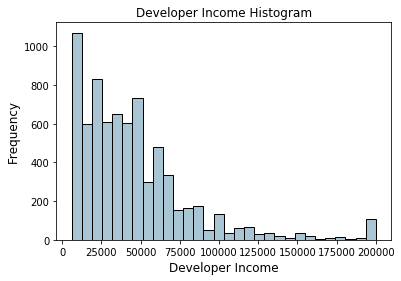

In [6]:
fig, ax = plt.subplots()
fcc_survey_df['Income'].hist(bins=30, color='#A9C5D3', 
                             edgecolor='black', grid=False)
ax.set_title('Developer Income Histogram', fontsize=12)
ax.set_xlabel('Developer Income', fontsize=12)
ax.set_ylabel('Frequency', fontsize=12)

Text(11.5, 450, '$\\mu$=10.43')

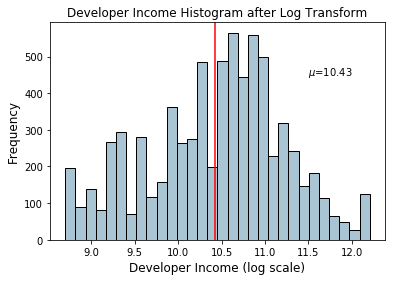

In [7]:
income_log_mean = np.round(np.mean(fcc_survey_df['Income_log']), 2)
fig, ax = plt.subplots()
fcc_survey_df['Income_log'].hist(bins=30, color='#A9C5D3', 
                                 edgecolor='black', grid=False)
plt.axvline(income_log_mean, color='r')
ax.set_title('Developer Income Histogram after Log Transform', 
             fontsize=12)
ax.set_xlabel('Developer Income (log scale)', fontsize=12)
ax.set_ylabel('Frequency', fontsize=12)
ax.text(11.5, 450, r'$\mu$='+str(income_log_mean), fontsize=10)

log transform适用于那些“低值区”元素很多，“高值区”元素稀疏的那些分布。

由此可见，经过log transform后，数据更接近正态分布了。

#### Box-Cox Transform

y=f(x,$\lambda$)=ln(x) if $\lambda$=0

y=f(x,$\lambda$)=$\frac{x^{\lambda}-1}{\lambda}$ if $\lambda$>0

In [9]:
income = np.array(fcc_survey_df['Income'])
income_clean = income[~np.isnan(income)]
l, opt_lambda = spstats.boxcox(income_clean)  # 用scipy中的函数估计最好的lambda
print('Optimal lambda value:', opt_lambda)

Optimal lambda value: 0.1179912266208748


In [10]:
fcc_survey_df['Income_boxcox_lambda_0'] = spstats.boxcox(
                                        (1+fcc_survey_df['Income']), 
                                          lmbda=0)
fcc_survey_df['Income_boxcox_lambda_opt'] = spstats.boxcox(
                                            fcc_survey_df['Income'], 
                                              lmbda=opt_lambda)

fcc_survey_df[['ID.x', 'Age', 'Income', 'Income_log', 
               'Income_boxcox_lambda_0',       
               'Income_boxcox_lambda_opt']].iloc[4:9]

c:\users\邱梓豪\appdata\local\programs\python\python37\lib\site-packages\scipy\stats\morestats.py:1029: RuntimeWarning: invalid value encountered in less_equal
  if any(x <= 0):


,ID.x,Age,Income,Income_log,Income_boxcox_lambda_0,Income_boxcox_lambda_opt
4,9368291c93d5d5f5c8cdb1a575e18bec,20.0,6000.0,8.699681,8.699681,15.180667
5,dd0e77eab9270e4b67c19b0d6bbf621b,34.0,40000.0,10.596660,10.596660,21.115340
6,7599c0aa0419b59fd11ffede98a3665d,23.0,32000.0,10.373522,10.373522,20.346418
7,6dff182db452487f07a47596f314bddc,35.0,40000.0,10.596660,10.596660,21.115340
8,9dc233f8ed1c6eb2432672ab4bb39249,33.0,80000.0,11.289794,11.289794,23.637129


Text(24, 450, '$\\mu$=20.65')

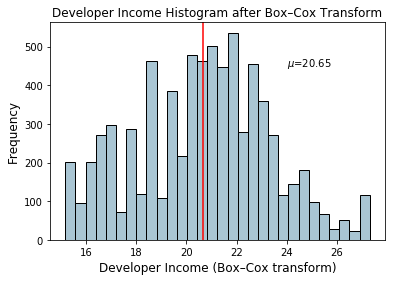

In [11]:
income_boxcox_mean = np.round(
                      np.mean(
                       fcc_survey_df['Income_boxcox_lambda_opt']),2)
fig, ax = plt.subplots()
fcc_survey_df['Income_boxcox_lambda_opt'].hist(bins=30, 
                     color='#A9C5D3', edgecolor='black', grid=False)
plt.axvline(income_boxcox_mean, color='r')
ax.set_title('Developer Income Histogram after Box–Cox Transform', 
             fontsize=12)
ax.set_xlabel('Developer Income (Box–Cox transform)', fontsize=12)
ax.set_ylabel('Frequency', fontsize=12)
ax.text(24, 450, r'$\mu$='+str(income_boxcox_mean), fontsize=10)

可以看出结果Box-Cox变换后，分布也很接近正态分布。

## 结语

Deep learning和一些ML框架（如AutoML）都可以自动提取特征，但特征工程仍然十分重要，需要关注数据的类型，定义域和要解决的问题